<font size="6"> Table of Contents</font>
<a id='destination_cell_10'></a> <br>
[Section 1](#destination_cell_1) <br><blockquote>
        1)  </blockquote>
[Section 2](#destination_cell_2)<br><blockquote>
        1) Pairplots<br>
 </blockquote>
[Section 3](#destination_cell_3)<br><blockquote>
        1) Evaluate distributions for features we will impute values for<br>
        2) Heatmap<br></blockquote>
[Section 4](#destination_cell_4)<br><blockquote>
        1) Set x and y<br>
</blockquote>


        





<font size="8">Section 1</font>
<a id='destination_cell_1'></a>

[Return to Table of Contents](#destination_cell_10)

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats 
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.linear_model import ElasticNet
from scipy.stats import mstats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [66]:
%cd /Users/nicholassanso/Desktop/GA/projects/project-2

/Users/nicholassanso/Desktop/GA/projects/project-2


In [67]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [68]:
df= pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [69]:
new_columns = [column.replace(' ', '_').replace('/', '_').lower() for column in df.columns]

df.columns = new_columns
print(new_columns)

['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'overall_qual', 'overall_cond', 'year_built', 'year_remod_add', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'paved_drive', 'wood_deck_sf'

<font size="8">Dropping Indexes and transforming target variable</font>
<a id='destination_cell_2'></a>

[Return to Table of Contents](#destination_cell_10)


In [ ]:
df = df.drop(columns=['garage_cars'])

Our problem set restricted our scope to residential housing in medium and low density. This is because the features we have data on are much more likely to appear in those categories. additionally the features that would drive sale price in the other categories are different from the ones that drive RL and RM. They wouldnt belong in the same regression even if you had the data.

Direct Capitalizaiton method:
    (Net Operating Income)/(r-g)

A- Etirely different input costs from residential housing. top three input costs for farms in the United States
    1) Energy
    2) Seeds
    3) Pesticides
    
C- Far more sensitive to changes in the business cycle than residential.

I- Generally long build times keep the industrial ETFs out of sync with the business cycle altogether. Entirely different input costs

**Exclude ms_zoning variables from all the dataframes because it is a completely different regression variable <br>
Exclude garage_cars because it measures in a metric, "length of car" which is a nonstandardized and meaningless metric (we also already have garage_area which measures a something very similar)**

In [75]:
# Create a boolean mask to drop rwws
mask = df['ms_zoning'].isin(['C (all)', 'A (agr)', 'I (all)', 'RH', 'FV'])

# Use the boolean mask to drop the rows in place
df.drop(df[mask].index, inplace=True)

(1914, 81)

In [ ]:
df_size = df[['id', 'pid', 'saleprice', 'misc_val', 'lot_frontage', 'lot_area','bsmtfin_sf_1' ,'bsmtfin_sf_2', 'bsmt_unf_sf', 
              'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'garage_area', 'wood_deck_sf',
              'open_porch_sf', 'enclosed_porch', 'pool_area', 'mas_vnr_area', 'screen_porch', '3ssn_porch']].copy()

df_quality_of_house_vars = df[['id', 'pid', 'saleprice', 'misc_val', 'overall_qual', 'overall_cond', 'exter_qual',
                               'exter_cond','bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2', 
                               'kitchen_qual', 'functional', 'fireplace_qu','garage_qual', 'garage_finish', 
                               'garage_cond', 'fence', 'pool_qc']].copy()

df_age_vars = df[['id', 'pid', 'saleprice', 'misc_val', 'year_built', 'year_remod_add', 'garage_yr_blt', 
                  'yr_sold','mo_sold']].copy()

df_roommage_vars = df[['id','pid','saleprice','misc_val','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath',
                       'bedroom_abvgr','kitchen_abvgr', 'totrms_abvgrd','fireplaces']].copy()

df_environment_vars = df[['id','pid','saleprice','misc_val','street','alley','neighborhood']].copy()


df_categories_of_house_vars = df[['id','pid','saleprice','misc_val','roof_style','roof_matl','exterior_1st',
                                  'exterior_2nd','mas_vnr_type', 'foundation','bsmt_exposure','heating','heating_qc',
                                  'central_air','electrical','garage_type','paved_drive', 'ms_subclass',
                                  'bldg_type','lot_shape','land_contour','utilities', 'lot_config',
                                      'land_slope','condition_1','condition_2','house_style']].copy()

Ultimately we would like to predict the sales price of a house.<br> 

Embedded in some (65) of our sales price datapoints is the value of miscellanious features. misc_features is unique in the datatset as it is the only feature of a house in which we are also given its exact monetary value (and therefore contribution to the target variable, salesprice). As a result, we can get a more acurate understanding of the relationship between our predictor variables and our target variable (saleprice) if we remove the value of the miscellanious features from saleprice, as leaving its value in saleprice would serve as a counding variable. After removing the value of the miscellanious features from saleprice, we are no longer strictly predicting saleprice, but the portion of saleprice that is not attributable to the miscellanious features. <br>

Subtracting the value of the miscelanious features provides the additional benefit of not losing the predictive power of the the miscelanious variables in predicting salesprice and not having to incorporate a predictive variable in which the vast majority of its values are imputed. The histograms below underscroe this point and allow illustrate two conclusions: <br> 
1) The miscellanious features are mostly sheds of nominal value <br> 
2) Most of our observations don't have a miscellanious value <br> 
    2.a. If we included miscellanious feature as a our regression we would have to impute values for the nulls which comprise the vast majority of our obsevations. <br>

From these two conclusions, it is probably best to drop these two features altogether.

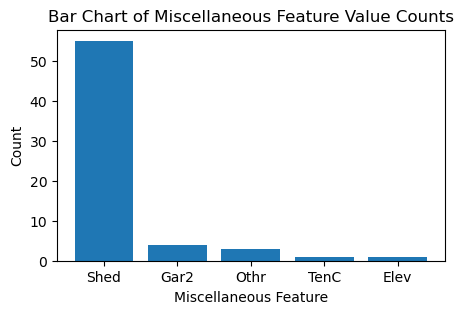

In [93]:
# Get value counts
value_counts = df['misc_feature'].value_counts()

# Create bar chart
plt.figure(figsize=(5,3))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Miscellaneous Feature')
plt.ylabel('Count')
plt.title('Bar Chart of Miscellaneous Feature Value Counts')
plt.show()


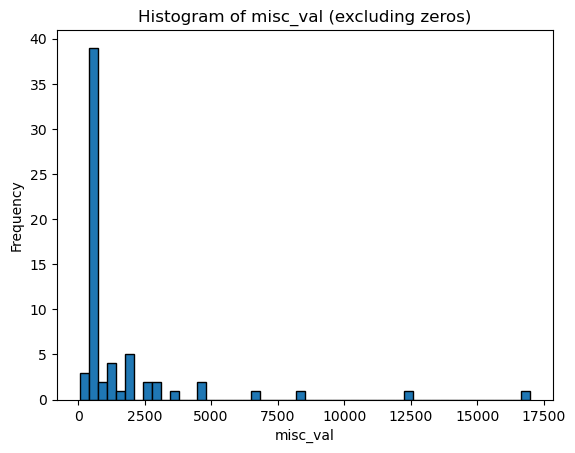

In [9]:
#Use the y-axis to gauge how few observations actually have miscellanious features and how many of the miscellanious features are of nominal value.

df_no_zeros = df[df['misc_val'] != 0]

plt.hist(df_no_zeros['misc_val'], bins=50, edgecolor='black')
plt.title('Histogram of misc_val (excluding zeros)')
plt.xlabel('misc_val')
plt.ylabel('Frequency')
plt.show()


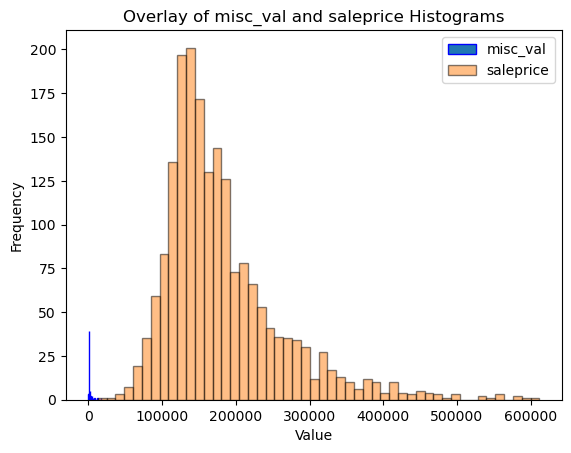

In [96]:
#plot the two histograms overlayed on one another to visually represent how immaterial misc_val is to saleprice as part of the justification for dropping the 
#feature from the regression model.

plt.hist(df_no_zeros['misc_val'], bins=50, edgecolor='blue', label='misc_val')
plt.hist(df['saleprice'], bins=50, edgecolor='black', alpha=0.5, label='saleprice')

plt.title('Overlay of misc_val and saleprice Histograms')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

**Some of the houses have high value miscelanious features like elevators. However, there is another feature, misc_value which specifically denotes the dollar amount of these features" so when training our model, we don't actually want to train it to predict saleprice, we want it to train to predict saleprice-misc_val, and then if a miscellanious item exists, to add on the value of the miscelleanious item at the end.**

In [12]:
def add_new_column(df):
    df['saleprice-misc_val'] = df['saleprice'] - df['misc_val']
    return df

df_size = add_new_column(df_size)
df_quality_of_house_vars = add_new_column(df_quality_of_house_vars)
df_age_vars = add_new_column(df_age_vars)
df_roommage_vars = add_new_column(df_roommage_vars)
df_environment_vars = add_new_column(df_environment_vars)
df_categories_of_house_vars = add_new_column(df_categories_of_house_vars)

<font size="8">Split data into train and test</font>
<a id='destination_cell_2'></a>

[Return to Table of Contents](#destination_cell_10)


<font size="8">Imputations and column drops</font>
<a id='destination_cell_2'></a>

[Return to Table of Contents](#destination_cell_10)


**We are looking here for a large gap in the number of missing values, if a large gap exists, then it will make our imputation threshold obvious. When getting rid of many variables with low single digit null values you run the risk that the indexes of the missing values don't match and that you are removing a large amount of data. We will drop all columns whose missing value perentage exceed the dotted red line.**

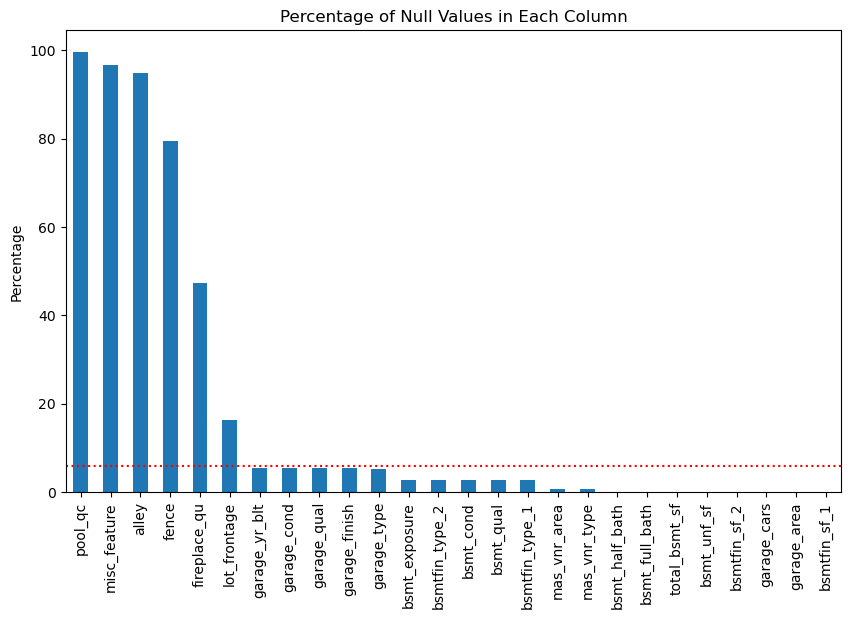

In [107]:
# Calculate the percentage of nulls in each column
null_percent = df.isnull().mean() * 100

# Filter out columns with no nulls
null_percent = null_percent[null_percent > 0]

# Sort in descending order
null_percent = null_percent.sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10, 6))
null_percent.plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Percentage of Null Values in Each Column')

# Add a horizontal dotted red line at y=6
plt.axhline(y=6, color='r', linestyle='dotted')

plt.show()

In [ ]:
#The globals() function is used to access the dataframe by its string name 
#Remember to execute this code in the environment where dfs are avaailable

Define the parameter grid for the RandomForestRegressor
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor()

# Initialize GridSearchCV with the RandomForestRegressor and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)

# Initialize Iterative Imputer with the GridSearchCV as the estimator
imputer = IterativeImputer(estimator=grid_search, max_iter=10, random_state=42)

# Define a dictionary with dataframes and corresponding columns to impute
df_dict = {
    'df_size': ['bsmtfin_sf_1','bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'garage_area','mas_vnr_area'],
    'df_roommage_vars': ['bsmt_full_bath', 'bsmt_half_bath'],
    'df_age_vars': ['garage_yr_blt'],
    'df_categories_of_house_vars': ['mas_vnr_type','garage_type','bsmt_exposure'],
    'df_quality_of_house_vars': ['garage_cond','garage_qual','garage_finish','bsmtfin_type_2','bsmt_cond','bsmt_qual','bsmtfin_type_1']
}

# Loop over the dictionary and perform imputation for each dataframe
for df_name, cols_to_impute in df_dict.items():
    globals()[df_name][cols_to_impute] = imputer.fit_transform(globals()[df_name][cols_to_impute])


In [ ]:
#drop columns with too many nulls
df = df_size.drop(columns=['lot_frontage'])
df_quality_of_house_vars.drop(columns=[['fireplace_qu','misc_feature']])
df_environment_vars.drop(columns=[['alley','fence']])

<font size="8">(standard?) scaling</font>
<a id='destination_cell_2'></a>

**noramalize before winsorize or pca** <br>
**scale only the numberic columns** <br>
[Return to Table of Contents](#destination_cell_10)


<font size="8">winsorize</font>
<a id='destination_cell_2'></a>

**winsorize only the numeric columns** <br>
[Return to Table of Contents](#destination_cell_10)


In [100]:
print("Data types for df_size:")
print(df_size.dtypes)
print("\nData types for df_quality_of_house_vars:")
print(df_quality_of_house_vars.dtypes)
print("\nData types for df_age_vars:")
print(df_age_vars.dtypes)
print("\nData types for df_roommage_vars:")
print(df_roommage_vars.dtypes)
print("\nData types for df_environment_vars:")
print(df_environment_vars.dtypes)
print("\nData types for df_categories_of_house_vars:")
print(df_categories_of_house_vars.dtypes)


Data types for df_size:
lot_frontage       float64
lot_area             int64
bsmtfin_sf_2       float64
bsmt_unf_sf        float64
total_bsmt_sf      float64
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
garage_area        float64
wood_deck_sf         int64
open_porch_sf        int64
enclosed_porch       int64
pool_area            int64
screen_porch         int64
3ssn_porch           int64
dtype: object

Data types for df_quality_of_house_vars:
saleprice              int64
misc_val               int64
overall_qual           int64
overall_cond           int64
exter_qual            object
exter_cond            object
bsmt_qual             object
bsmt_cond             object
bsmtfin_type_1        object
bsmtfin_type_2        object
kitchen_qual          object
functional            object
fireplace_qu          object
garage_qual           object
garage_finish         object
garage_cond           object
fence                 object
pool_qc               

In [ ]:
# Assuming df is your DataFrame
df_size = df[['saleprice', 'misc_val', 'lot_frontage', 'lot_area', 'bsmtfin_sf_2', 'bsmt_unf_sf', 
              'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'garage_area', 'wood_deck_sf',
              'open_porch_sf', 'enclosed_porch', 'pool_area', 'screen_porch', '3ssn_porch']].copy()

# Apply the winsorize function to each column
for col in df_size.columns:
    df_size[col] = winsorize(df_size[col], limits=[0.05, 0.05])



Some square footage variables that have high correlations and therefore violate regression's no multicollinearity requirement. In particular we see a correlation of .81 between the squre footage of the basement and the first floor. We also see a .57 correlation between lot area and lot frontage. Instead of removing one of hte highly correlated vairables, we will perform PCA on all of the square footage variables

<font size="8">PCA</font>
<a id='destination_cell_2'></a>

[Return to Table of Contents](#destination_cell_10)


<font size="8">test for multicollinearity</font>
<a id='destination_cell_2'></a>

[Return to Table of Contents](#destination_cell_10)


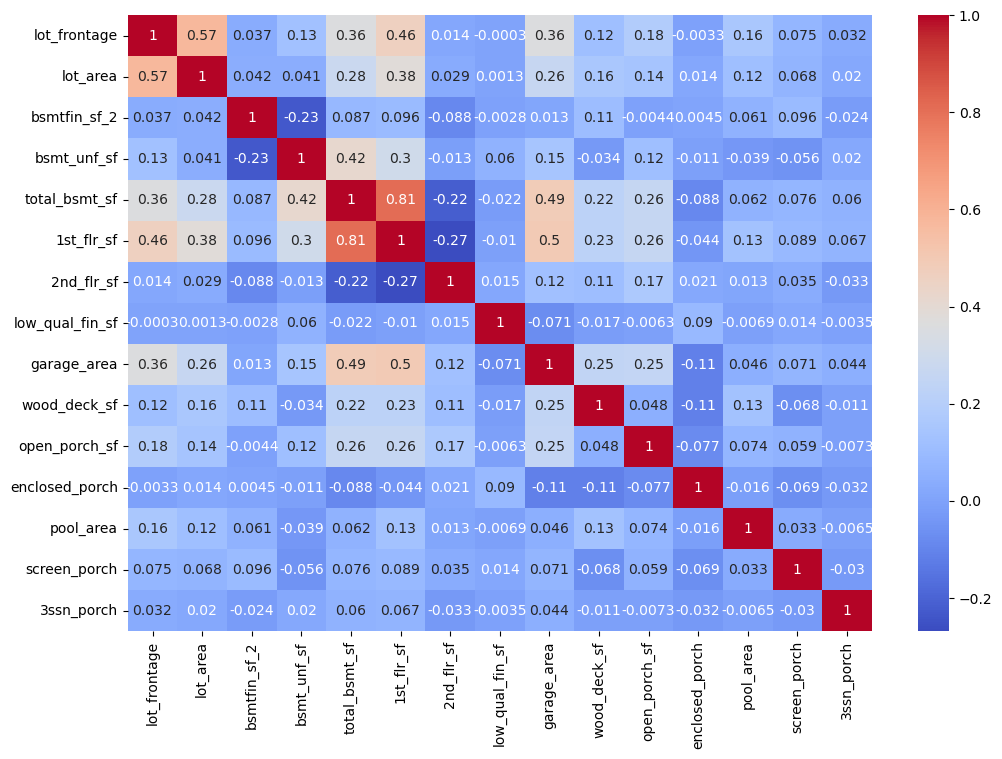

In [14]:
# List of columns to exclude
exclude_columns = ['saleprice','misc_val','saleprice-misc_val']

# Drop the columns
df_size = df_size.drop(columns=exclude_columns)

# Create the heatmap
plt.figure(figsize=(12,8)) # Set the figure size
sns.heatmap(df_size.corr(), annot=True, cmap='coolwarm') # Create a heatmap with correlations
plt.show()


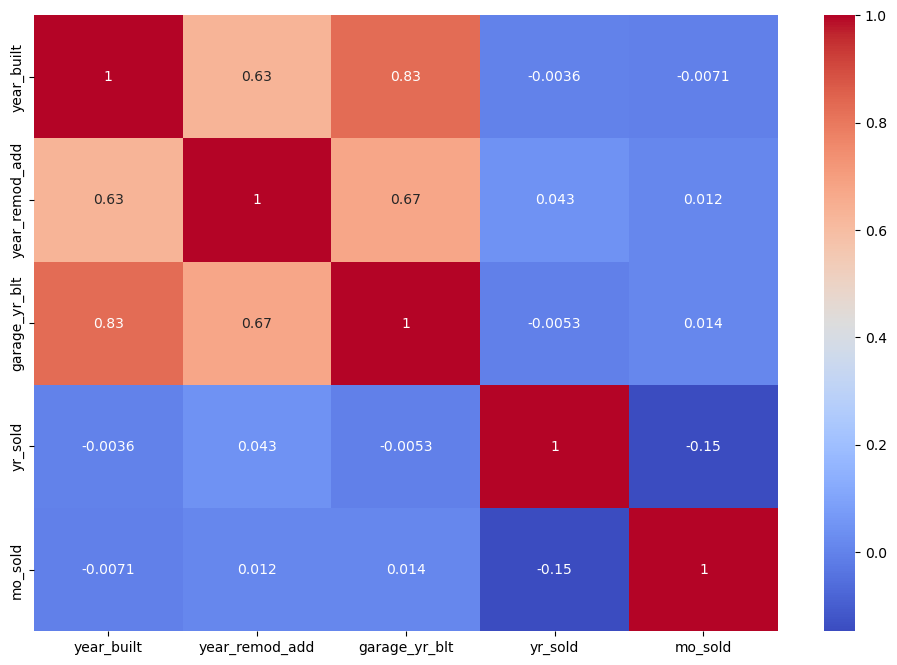

In [19]:
# List of columns to exclude
exclude_columns = ['saleprice','misc_val','saleprice-misc_val']

# Drop the columns
df_age_vars = df_age_vars.drop(columns=exclude_columns)

# Create the heatmap
plt.figure(figsize=(12,8)) # Set the figure size
sns.heatmap(df_age_vars.corr(), annot=True, cmap='coolwarm') # Create a heatmap with correlations
plt.show()


<font size="8">test linearity assumption (pairplots)</font>
<a id='destination_cell_2'></a>

[Return to Table of Contents](#destination_cell_10)


<font size="8">Scaling and oneHot Encoding</font>
<a id='destination_cell_2'></a>

[Return to Table of Contents](#destination_cell_10)



**we will use a form of robust scaling that is less sensitive to outliers to perform our pca, we will use the interquartile range to reduce our sensitivity**
**we could use the pairplots to identify individual outliers and then drop them by index**
**we could just normalize using standard deviation, and then winsorize the data by dropping all values above a certain SD**
**winsorize the contiuous features to deal with outliers**



To gain confidence in the linear relationship between a categorical predictor variable and a target variable, you can follow these steps:

Visualize the data: Create box plots or violin plots of the target variable for each category of the predictor variable. If there is a linear relationship, you should see a consistent increase or decrease in the median of the target variable as you move from one category to the next.

Statistical tests: Perform an Analysis of Variance (ANOVA) to test if there are significant differences in the mean of the target variable across the categories. If there are significant differences, it suggests that the categorical variable does have an effect on the target variable.


In [ ]:
#get numeric cols
numeric = [col for col in X_train._get_numeric_data().columns]

#get non-numeric cols 
categories = X_train.select_dtypes(include = 'object').columns

In [ ]:
ohe = OneHotEncoder(drop = 'if_binary',
                   sparse_output = False,
                   handle_unknown = 'ignore')

ctx = ColumnTransformer(
    transformers =[
        ('ohe', ohe, categories),
        ('ss', StandardScaler(), numeric)
    ], remainder = 'passthrough', verbose_feature_names_out=False)

In [ ]:
# Fit the ColumnTransformer to the training data
ctx.fit(X_train)

# Transform the training data
X_train_transformed = ctx.transform(X_train)

# Transform the validation data
X_val_transformed = ctx.transform(X_val)


In [ ]:
# Get the transformed column names
transformed_columns = ctx.get_feature_names_out()

# Create a DataFrame from the transformed data with the column names
df_transformed = pd.DataFrame(X_train_transformed, columns=transformed_columns)




<font size="8">Fitting the Model</font>
<a id='destination_cell_6'></a>
[Return to Table of Contents](#destination_cell_10)



In [ ]:
lr = LinearRegression()


In [ ]:
# Combine the ColumnTransformer and LinearRegression model into a pipeline
lr_pipe = Pipeline(steps=[
    ('ctx', ctx),
    ('lr', lr)
])

# Fit the pipeline to the training data
lr_pipe.fit(X_train, y_train)

In [ ]:
# get the coefficients and intercept
coefficients = lr_pipe.named_steps['lr'].coef_
intercept = lr_pipe.named_steps['lr'].intercept_

# print the equation
equation = "y = " + str(intercept)
for i, coef in enumerate(coefficients):
    equation += " + " + str(coef) + " * x" + str(i+1)
print(equation)


In [ ]:
y_pred = lr_pipe.predict(X_val)
residuals=y_pred - y_val
plt.hist(residuals, bins = 20);

In [ ]:
# Looks random

plt.scatter(y_pred, residuals, s = 1)
plt.axhline(0, color = 'orange');

In [ ]:
cross_val_score(lr_pipe, X_train, y_train)


In [ ]:
scores = cross_val_score(lr_pipe, X_train, y_train)
std_dev = np.std(scores)
std_dev

In [ ]:
cross_val_score(lr_pipe, X_train, y_train).mean()


In [ ]:
lr_pipe.score(X_train, y_train)

In [ ]:
lr_pipe.score(X_val, y_val)


In [ ]:
#RMSE
mean_squared_error(y_train, lr_pipe.predict(X_train), squared = False)

In [ ]:
#RMSE
mean_squared_error(y_val, lr_pipe.predict(X_val), squared = False)

<font size="8">Section 7</font>
<a id='destination_cell_7'></a>

[Return to Table of Contents](#destination_cell_10)

In [ ]:
#instantiate it
rg_pipe = Pipeline(
    steps = [
        ('ctx', ctx),
        ('rg', Ridge(alpha = 10))
    ]
)

#fit it!
rg_pipe.fit(X_train, y_train)

In [ ]:
y_pred_rg = rg_pipe.predict(X_val)

In [ ]:
y_pred_rg = rg_pipe.predict(X_val)
residuals_rg=y_pred_rg - y_val
plt.hist(residuals_rg, bins = 20);

In [ ]:
# Looks random

plt.scatter(y_pred_rg, residuals_rg, s = 1)
plt.axhline(0, color = 'green');

In [ ]:
cross_val_score(rg_pipe, X_train, y_train)

In [ ]:
cross_val_score(rg_pipe, X_train, y_train).mean()

In [ ]:
scores_rg = cross_val_score(rg_pipe, X_train, y_train)
std_dev_rg = np.std(scores_rg)
std_dev_rg

In [ ]:
rg_pipe.score(X_train, y_train)

In [ ]:
rg_pipe.score(X_val, y_val)

In [ ]:
#RMSE
mean_squared_error(y_train, rg_pipe.predict(X_train), squared = False)

In [ ]:
#RMSE
mean_squared_error(y_val, rg_pipe.predict(X_val), squared = False)

<font size="8">Section 8</font>
<a id='destination_cell_8'></a>

[Return to Table of Contents](#destination_cell_10)

In [ ]:
#instantiate it
lasso_pipe = Pipeline(
    steps = [
        ('ctx', ctx),
        ('lasso', Lasso(alpha=5.0))
    ]
)

#fit it!
lasso_pipe.fit(X_train, y_train)

In [ ]:
y_pred_lasso = lasso_pipe.predict(X_val)


In [ ]:
y_pred_lasso = lasso_pipe.predict(X_val)
residuals_lasso = y_pred_lasso - y_val
plt.hist(residuals_lasso, bins = 20);

In [ ]:
# Looks random

plt.scatter(y_pred_lasso, residuals_lasso, s = 1)
plt.axhline(0, color = 'red');

In [ ]:
cross_val_score(lasso_pipe, X_train, y_train)

In [ ]:
cross_val_score(lasso_pipe, X_train, y_train).mean()

In [ ]:
scores_lasso = cross_val_score(lasso_pipe, X_train, y_train)
std_dev_lasso = np.std(scores_lasso)
std_dev_lasso

In [ ]:
lasso_pipe.score(X_train, y_train)

In [ ]:
lasso_pipe.score(X_val, y_val)

In [ ]:
#RMSE
mean_squared_error(y_train, lasso_pipe.predict(X_train), squared = False)

In [ ]:
#RMSE
mean_squared_error(y_val, lasso_pipe.predict(X_val), squared = False)


<font size="8">Section 9</font>
<a id='destination_cell_9'></a>

[Return to Table of Contents](#destination_cell_10)

In [ ]:
#instantiate it
elastic_pipe = Pipeline(
    steps = [
        ('ctx', ctx),
        ('elastic', ElasticNet(alpha=1.0))
    ]
)

#fit it!
elastic_pipe.fit(X_train, y_train)

In [ ]:
y_pred_elastic = elastic_pipe.predict(X_val)


In [ ]:
y_pred_elastic = lasso_pipe.predict(X_val)
residuals_elastic= y_pred_lasso - y_val
plt.hist(residuals_elastic, bins = 20);

In [ ]:
# Looking for randomness!

plt.scatter(y_pred_elastic, residuals_elastic, s = 1)
plt.axhline(0, color = 'purple');

In [ ]:
cross_val_score(elastic_pipe, X_train, y_train)

In [ ]:
scores_elastic = cross_val_score(elastic_pipe, X_train, y_train)
std_dev_elastic = np.std(scores_elastic)
std_dev_elastic

In [ ]:
cross_val_score(elastic_pipe, X_train, y_train).mean()

In [ ]:
elastic_pipe.score(X_train, y_train)

In [ ]:
elastic_pipe.score(X_val, y_val)

In [ ]:
#RMSE
mean_squared_error(y_train, elastic_pipe.predict(X_train), squared = False)

In [ ]:
#RMSE
mean_squared_error(y_val, elastic_pipe.predict(X_val), squared = False)


<font size="8">test residual autocorrelations</font>
<a id='destination_cell_9'></a>

[Return to Table of Contents](#destination_cell_10)


<font size="8">test residual heteroskedasticity</font>
<a id='destination_cell_9'></a>

[Return to Table of Contents](#destination_cell_10)


<font size="8">test residual normality</font>
<a id='destination_cell_9'></a>

[Return to Table of Contents](#destination_cell_10)